# National contour map of earthquake risk

We started out with a USA-wide map with contours of earthquake risk, from [this source](https://geo.nyu.edu/catalog/stanford-rm034qp5477).  The only problem with it is that it's representing risk as a range, and that range is encoded as a string.  For visualization purposes, that should be turned into a single floating point number.  This notebook fixes the problem and exports the resulting map.


## Units and code names

I talk about earthquake risk throughout this notebook, though technically what we have is the maximum acceleration that has a 10% probability of being caused by earthquakes during the next 50 years. Since this is acceleration at ground level, and expressed as a percent of standard gravity, some sources call it percent ground acceleration (`pga`) or `percent_g`.

From the source:
```
The data represent a model showing the probability that ground motion will reach a certain level. This map layer shows peak horizontal ground acceleration (the fastest measured change in speed, for a particle at ground level that is moving horizontally due to an earthquake) with a 10% probability of exceedance in 50 years. Values are given in %g, where g is acceleration due to gravity, or 9.8 meters/second^2.
```

In [7]:
import numpy as np
import geopandas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import a map of earthquake risk contour lines.
quakes = geopandas.read_file('../data_input/2_earthquakes/stanford-rm034qp5477-geojson.json')

# The earthquake risk is a range of numbers, encoded as a string.  I'll
# turn that into a single float number that represents the center
# value of the range.  Anything marked '> 100' will get the value 110.

temp1 = quakes.percent_g.replace('> 100', '100 - 120')
range_limits = [x.split(' - ') for x in temp1]
range_averages = [(int(x[0]) + int(x[1]))/2 for x in range_limits]
quakes['pga'] = range_averages

# Drop useless columns
quakes = quakes.drop(columns=['id','percent_g','valley'])

In [3]:
print(quakes.shape)
quakes.head(3)

(3647, 2)


,geometry,pga
0,"(POLYGON ((-148.0819519 68.31804848, -148.0153...",17.5
1,"(POLYGON ((-160.26234436 67.96234511999999, -1...",17.5
2,"(POLYGON ((-168.83474149 63.06699937, -168.840...",4.5


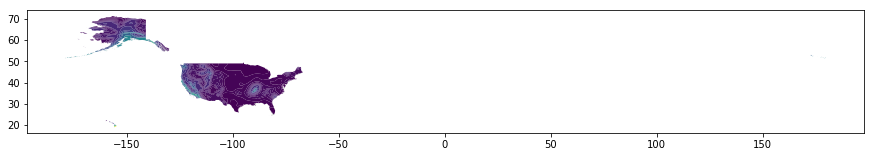

In [15]:
# Full map including all territories
quakes.plot(column='pga', figsize=(15,15));

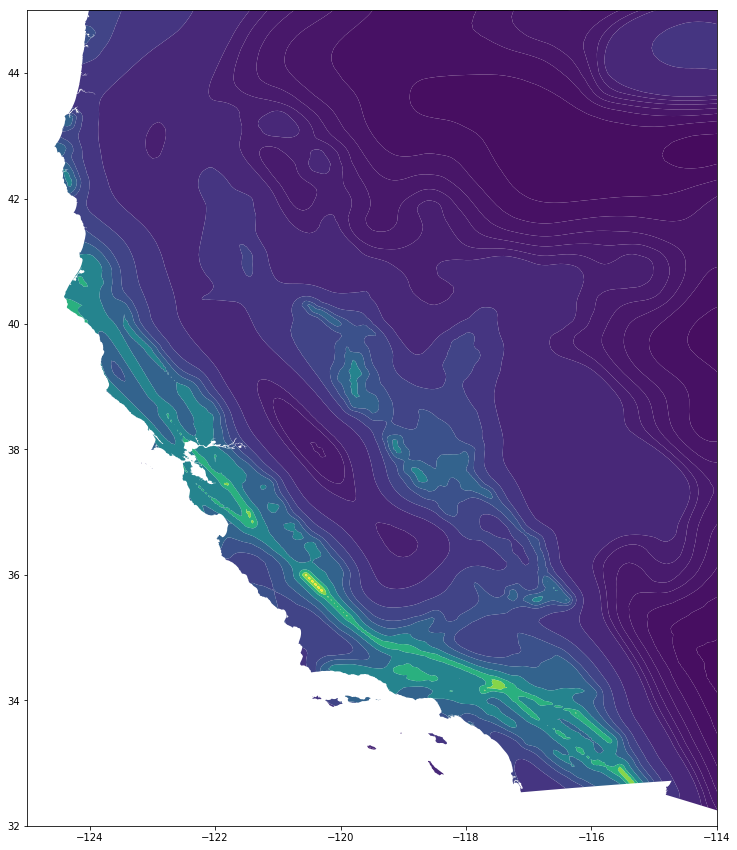

In [16]:
# Closeup of California
fig, ax = plt.subplots(figsize=(15,15))
quakes.plot(ax=ax, column='pga');
ax.set_xlim(-125,-114)
ax.set_ylim(32,45)
plt.show()

In [19]:
# I export it as a SHP file.
quakes.to_file('../data_output/1__quake_contour')